### Machine Learning desarrollo práctica final de módulo

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [247]:
# definimos una función para representar el resultado del ajuste
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    #plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

In [248]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

# ejecute esta celda
def miRegresionLineal(x_i,y_i,x,y,degree):
    poly = PolynomialFeatures(degree)
    X_i  = poly.fit_transform(x_i.reshape(-1, 1))
    X_test = poly.fit_transform(x.reshape(-1, 1))
    lr     = LinearRegression().fit(X_i,y_i)
    
    y_hat = lr.predict(X_i)
    fw = lr.predict(X_test)
    
    error_train = np.mean(np.power(y_i-y_hat,2)) 
    error_test  = np.mean(np.power(y-fw,2)) 
    
   # print(lr.coef_)
    
    return fw, error_test, error_train

In [249]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("./Data/airbnb-listings.csv", sep=";", decimal=".")
#airbnb_Data.head(5).T

In [250]:
#Calculamos el número de muestras y la dimensionalidad inicial.
#airbnb_Data.describe()
#airbnb_Data.isnull
#airbnb_Data.shape
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 14780 y la dimensionalidad es de 89


In [251]:
# Procedemos a eliminar rows que creemos no son necesarias y que no nos afectarán a la porción que separemos de test.

airbnb_Data.drop(['ID','Listing Url', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description','Experiences Offered'
                  ,'Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules',
                  'Thumbnail Url','Medium Url', 'Picture Url',
                'XL Picture Url', 'Host ID', 'Host URL','Host Name','Host About','Host Thumbnail Url'
                  ,'Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Features',
                 'Host Location','Neighbourhood Cleansed','License','Jurisdiction Names','Host Acceptance Rate'
                 ,'Amenities','Calendar last Scraped','Calendar Updated','Host Since','State','Market'
                ,'Smart Location','Has Availability','First Review','Last Review'],
                 axis=1,inplace=True)

In [252]:
airbnb_Data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Host Response Time,within an hour,NaN,within a few hours,within a few hours,within an hour,within a day,within an hour,NaN,within an hour,within a few hours,within an hour,within an hour,within an hour,within an hour,within a day
Host Response Rate,100,NaN,100,100,100,100,99,NaN,99,100,100,99,99,100,90
Host Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Host Total Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Neighbourhood Group Cleansed,NaN,NaN,NaN,Sant Martí,Sarrià-Sant Gervasi,Gràcia,Gràcia,Sarrià-Sant Gervasi,Sants-Montjuïc,Sants-Montjuïc,Eixample,Eixample,Eixample,Eixample,Ciutat Vella
City,Amsterdam,Antwerpen,Austin,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona
Zipcode,1074 VM,2018,78703,08018,08021,08012,08037,08022,08014,08028,08009,08009,08009,08008,08002
Country Code,NL,BE,US,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
Country,Netherlands,Belgium,United States,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
Latitude,52.3527,51.2048,30.2871,41.3947,41.3963,41.4016,41.4035,41.4092,41.3762,41.3728,41.3972,41.391,41.3916,41.3945,41.3814


In [264]:
#Lo dejamos para más adelante para determinar si tenemos outliers
#airbnb_Data.describe()


In [266]:
#Verificamos el nombre de de cada columna(dimensión)
feature_names = airbnb_Data.columns[1:]

In [255]:
feature_names

Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood Group Cleansed', 'City',
       'Zipcode', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation'],
      dtype='object')

In [256]:
#airbnb_Data["Property Type"].value_counts()
#airbnb_Data["Bed Type"].value_counts()
#Property Type
#Room Type
#Bed Type
#Cancellation Policy
#airbnb_Data["Host Response Time"].value_counts()
#airbnb_Data["City"].value_counts()
#Neighbourhood Group Cleansed
#City



In [257]:
# En esta celda, filtraremos las poblaciones que contengan Madrid
# El csv descargado debía contener únicamente datos pertenecientes a Madrid

#Borramos todos los valores nulo en City
airbnb_Data.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_Data = airbnb_Data[airbnb_Data["City"].str.contains('Madrid', na=False, case=False) ]

#Mostramos un conteo de todos los resultados agrupados por City
airbnb_Data["City"].value_counts()



Madrid                                 13207
Madrid, Comunidad de Madrid, ES           20
madrid                                     8
MADRID                                     2
Aravaca (Madrid)                           1
Chueca, Madrid                             1
Centro, Madrid                             1
Delicias-Madrid                            1
Comunidad de Madrid                        1
las matas  madrid                          1
Madrid, Vallecas (Fontarrón)               1
Madrid, Comunidad de Madrid, ESPANA        1
Name: City, dtype: int64

In [267]:
print('Datos airbnb antes del borrado de NaN en Price: ', airbnb_Data.shape)

Datos airbnb antes del borrado de NaN en Price:  (13236, 44)


In [268]:
#Nuestro target es el precio, por lo tanto no podemos admitir registros sin precio
airbnb_Data.dropna(subset=['Price'],inplace=True)


In [269]:
print('Datos airbnb después del borrado de NaN en Price: ', airbnb_Data.shape)

Datos airbnb después del borrado de NaN en Price:  (13236, 44)


In [272]:
#Procedemos a separar el Training y el Test, lo haremos generando dos datasets y los guardaremos
#en nuestro directorio ./Data para posteriormente cargarlos y procesarlos

from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_Data, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos
train.to_csv('./Data/Airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./Data/Airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10588, 44)
Dimensiones del dataset de test: (2648, 44)


In [261]:
#airbnb_Data[(airbnb_Data['Bathrooms'].isnull())]['Bathrooms']

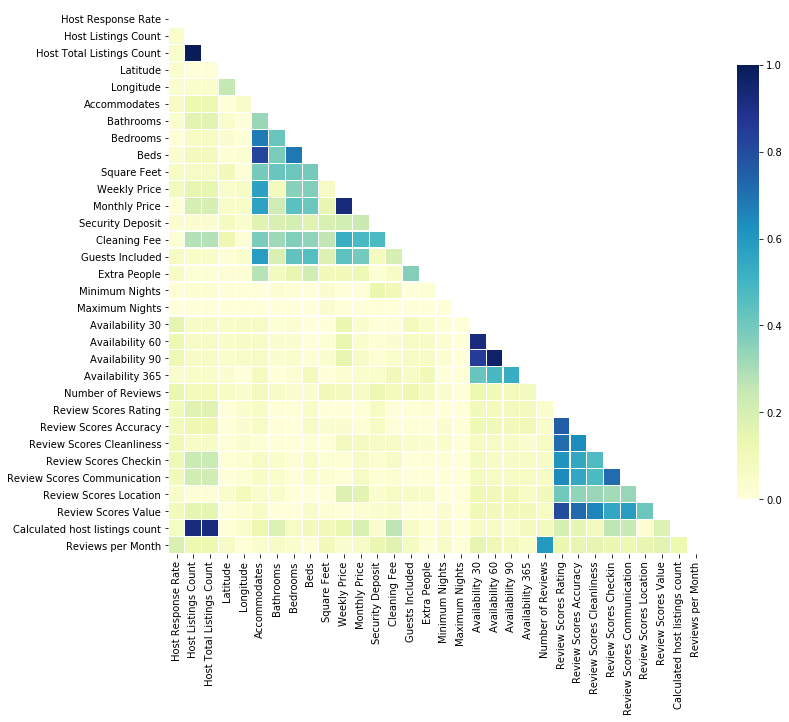

In [262]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [263]:
# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

NameError: name 'house_data' is not defined